# Этим проектом выявляем наиболее перспективный тариф для телеком компании
Описание проекта:

В компании федерального оператора сотовой связи клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов.
Проанализируем поведение клиентов, сделаем вывод — какой тариф лучше оставить для дальнейшего развития компании.







Шаг 1. Изучить общую информацию;
Шаг 2. Подготовить данные;
Шаг 3. Проанализировать данные;
Шаг 4. Проверить гипотезы;
Шаг 5. Напишите общий вывод;






In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()


#имеем 4 колонки и 3 разных типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()

#имеем 5 колонок и 3 разных типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [4]:
messeges = pd.read_csv('/datasets/messages.csv')
messeges.info()

# 3 колонки и 2 типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs.head(5)
# 8 колонок и 2 типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv')
users.info()
users.head(15)

#8 колонок и 2 типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [7]:
#users.duplicated()
#calls.duplicated()
#internet.duplicated()
#tariffs.duplicated()
messeges.duplicated()

#дубликаты не найдены

0         False
1         False
2         False
3         False
4         False
          ...  
123031    False
123032    False
123033    False
123034    False
123035    False
Length: 123036, dtype: bool

In [8]:
#приведем даты к соотвествующему типу данных
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
 
    
calls['duration'] = calls['duration'].apply(np.ceil)

#создадим доп столбец с месяцем
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

calls.info()
calls.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8


In [9]:
#приведем даты к соотвествующему типу данных
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#создадим доп столбец с месяцем
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
5,5,1000_5,399.97,2018-10-02,1000,10
6,6,1000_6,540.08,2018-09-07,1000,9
7,7,1000_7,415.70,2018-07-11,1000,7
8,8,1000_8,505.40,2018-10-08,1000,10
9,9,1000_9,345.54,2018-09-03,1000,9


In [10]:
#изменим тип данных в user_id - приведём его к int
messeges['user_id'] = messeges['user_id'].astype('int')

#приведем даты к соотвествующему типу данных
messeges['message_date'] = pd.to_datetime(messeges['message_date'], format='%Y-%m-%d')

#создадим доп столбец с месяцем
messeges['month'] = pd.DatetimeIndex(messeges['message_date']).month
messeges.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [11]:
#приведем даты в столбцах churn_date и reg_date к соответствующим форматам
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')



In [12]:
#Склеили таблицу users и  tariffs и удалили задвоенный столбец с тарифами
users_tariffs = users.merge(tariffs, left_on = 'tariff',right_on = 'tariff_name' ,how = 'left')
users_tariffs.drop(["tariff_name"], axis = 1, inplace = True)
users_tariffs.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


In [13]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
calls_month = calls.groupby(['user_id', 'month']).agg({'duration' : 'sum','id':'count'}).reset_index().query('month != 0')
calls_month.rename(columns = {'duration': 'min_sum', 'id': 'calls_count'}, inplace=True)
calls_month.head(10)



,user_id,month,min_sum,calls_count
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
5,1000,10,350.0,57
6,1000,11,338.0,43
7,1000,12,333.0,46
8,1001,11,430.0,59
9,1001,12,414.0,63


In [14]:
#количество отправленных сообщений по месяцам;
messeges_month = messeges.groupby(['user_id','month']).agg({'id':'count'}).reset_index()
messeges_month.rename(columns = {'id': 'messeges_count'}, inplace=True)
messeges_month.head(10)

,user_id,month,messeges_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [15]:
#объем израсходованного интернет-трафика по месяцам

internet_month = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
internet_month.head(10)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


In [16]:
#Помесячная выручка
# Объеденим звонки минуты гигобайты каждого пользователя, и добавим тарифный план
total_users = calls_month.merge(messeges_month,  on=['user_id', 'month'], how='outer')
total_users = total_users.merge(internet_month,  on=['user_id', 'month'], how='outer')
total_users = total_users.reset_index(drop=False)
total_users = total_users.merge(users[['user_id', 'tariff','city']], on='user_id', how='left')

In [17]:
# Заменю пропущенные значения на нули
total_users.loc[total_users['min_sum'].isna(), 'min_sum'] = 0
total_users.loc[total_users['calls_count'].isna(), 'calls_count'] = 0
total_users.loc[total_users['messeges_count'].isna(), 'messeges_count'] = 0
total_users.loc[total_users['mb_used'].isna(), 'mb_used'] = 0
total_users.head(5)

,index,user_id,month,min_sum,calls_count,messeges_count,mb_used,tariff,city
0,0,1000,5,159.0,22.0,22.0,2253.49,ultra,Краснодар
1,1,1000,6,172.0,43.0,60.0,23233.77,ultra,Краснодар
2,2,1000,7,340.0,47.0,75.0,14003.64,ultra,Краснодар
3,3,1000,8,408.0,52.0,81.0,14055.93,ultra,Краснодар
4,4,1000,9,466.0,58.0,57.0,14568.91,ultra,Краснодар


Вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифноve плану


In [18]:

def revenue_calc(row):
    duration = row['min_sum']
    calls = row['calls_count']
    num_messages = row['messeges_count']
    mb = row['mb_used']
    tariff = row['tariff']
    
    if tariff == 'smart':
        over_duration = duration - tariffs.loc[0, 'minutes_included']
        over_mb = mb - tariffs.loc[0, 'mb_per_month_included']
        over_messages = num_messages - tariffs.loc[0, 'messages_included']
        
        if over_duration < 0:
            over_duration = 0
        if over_mb < 0:
            over_mb = 0
        if over_messages < 0:
            over_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * over_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * ((over_mb - 1)//1024+1) + 
                   tariffs.loc[0, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        over_duration = duration - tariffs.loc[1, 'minutes_included']
        over_mb = mb - tariffs.loc[1, 'mb_per_month_included']
        over_messages = num_messages - tariffs.loc[1, 'messages_included']
        
        if over_duration < 0:
            over_duration = 0
        if over_mb < 0:
            over_mb = 0
        if over_messages < 0:
            over_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * over_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * ((over_mb - 1)//1024+1) + 
                   tariffs.loc[1, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

In [19]:
total_users['revenue'] = total_users.apply(revenue_calc, axis=1)
total_users.head(5)

,index,user_id,month,min_sum,calls_count,messeges_count,mb_used,tariff,city,revenue
0,0,1000,5,159.0,22.0,22.0,2253.49,ultra,Краснодар,1950.0
1,1,1000,6,172.0,43.0,60.0,23233.77,ultra,Краснодар,1950.0
2,2,1000,7,340.0,47.0,75.0,14003.64,ultra,Краснодар,1950.0
3,3,1000,8,408.0,52.0,81.0,14055.93,ultra,Краснодар,1950.0
4,4,1000,9,466.0,58.0,57.0,14568.91,ultra,Краснодар,1950.0


In [20]:
#создадим две таблицы по тарифам
smart = total_users.query('tariff == "smart"')
ultra= total_users.query('tariff == "ultra"')

In [21]:
smart.head(10)

,index,user_id,month,min_sum,calls_count,messeges_count,mb_used,tariff,city,revenue
8,8,1001,11,430.0,59.0,0.0,18429.34,smart,Москва,1150.0
9,9,1001,12,414.0,63.0,0.0,14036.66,smart,Москва,550.0
10,10,1002,6,117.0,15.0,4.0,10856.82,smart,Стерлитамак,550.0
11,11,1002,7,214.0,26.0,11.0,17580.10,smart,Стерлитамак,1150.0
12,12,1002,8,289.0,42.0,13.0,20319.26,smart,Стерлитамак,1550.0
13,13,1002,9,206.0,36.0,4.0,16691.08,smart,Стерлитамак,950.0
14,14,1002,10,212.0,33.0,10.0,13888.25,smart,Стерлитамак,550.0
15,15,1002,11,243.0,32.0,16.0,18587.28,smart,Стерлитамак,1350.0
16,16,1002,12,236.0,33.0,12.0,18113.73,smart,Стерлитамак,1150.0
30,30,1005,1,95.0,15.0,7.0,2727.97,smart,Набережные Челны,550.0


In [22]:
print('SMART, в среднем за месяц:')
print('')
print('Минут разговора:', smart['min_sum'].describe()['mean'])
print('Сообщений:', smart['messeges_count'].describe()['mean'])
print('Мегабайт интернета:', smart['mb_used'].describe()['mean'])
print('')
print('Стандартное отклонение минут разговора:', smart['min_sum'].describe()['std'])
print('Стандартное отклонение сообщений:', smart['messeges_count'].describe()['std'])
print('Стандартное отклонение мегабайт интернета:', smart['mb_used'].describe()['std'])
print('')
print('Дисперсия минут разговора:', smart['min_sum'].describe()['std'] ** 2)
print('Дисперсия сообщений:', smart['messeges_count'].describe()['std'] ** 2)
print('Дисперсия мегабайт интернета:', smart['mb_used'].describe()['std'] ** 2)
print('')
print('Лимит минут в среднем превышен на:', users_tariffs['rub_per_minute'].describe()['mean'])
print('Лимит сообщений в среднем превышен на:', users_tariffs['rub_per_message'].describe()['mean'])
print('Лимит мегабайт в среднем превышен на:', users_tariffs['rub_per_gb'].describe()['mean'])
print('')
print('ULTRA, в среднем за месяц:')
print('')
print('Минут разговора:', ultra['min_sum'].describe()['mean'])
print('Сообщений:', ultra['messeges_count'].describe()['mean'])
print('Мегабайт интернета:', ultra['mb_used'].describe()['mean'])
print('')
print('Стандартное отклонение минут разговора:', ultra['min_sum'].describe()['std'])
print('Стандартное отклонение сообщений:', ultra['messeges_count'].describe()['std'])
print('Стандартное отклонение мегабайт интернета:', ultra['mb_used'].describe()['std'])
print('')
print('Дисперсия минут разговора:', ultra['min_sum'].describe()['std'] ** 2)
print('Дисперсия сообщений:', ultra['messeges_count'].describe()['std'] ** 2)
print('Дисперсия мегабайт интернета:', ultra['mb_used'].describe()['std'] ** 2)
print('')
print('Лимит минут в среднем превышен на:', users_tariffs['minutes_included'].describe()['mean'])
print('Лимит сообщений в среднем превышен на:', users_tariffs['messages_included'].describe()['mean'])
print('Лимит мегабайт в среднем превышен на:', users_tariffs['rub_per_gb'].describe()['mean'])



SMART, в среднем за месяц:

Минут разговора: 417.9349484073576
Сообщений: 33.384028712427096
Мегабайт интернета: 16208.386989681472

Стандартное отклонение минут разговора: 190.31372988921288
Стандартное отклонение сообщений: 28.22787555676141
Стандартное отклонение мегабайт интернета: 5870.476681049199

Дисперсия минут разговора: 36219.31578434428
Дисперсия сообщений: 796.8129584480083
Дисперсия мегабайт интернета: 34462496.46274242

Лимит минут в среднем превышен на: 2.404
Лимит сообщений в среднем превышен на: 2.404
Лимит мегабайт в среднем превышен на: 185.1

ULTRA, в среднем за месяц:

Минут разговора: 526.6233502538071
Сообщений: 49.36345177664975
Мегабайт интернета: 19468.805208121827

Стандартное отклонение минут разговора: 317.6060978591264
Стандартное отклонение сообщений: 47.804457350174715
Стандартное отклонение мегабайт интернета: 10087.170752166034

Дисперсия минут разговора: 100873.63339730098
Дисперсия сообщений: 2285.266142544673
Дисперсия мегабайт интернета: 101751013

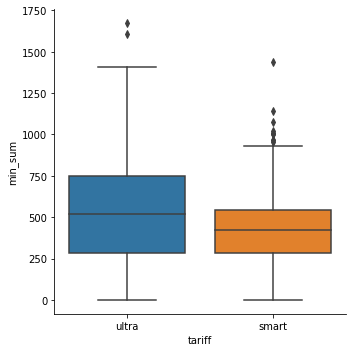

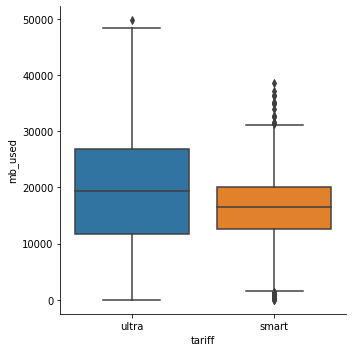

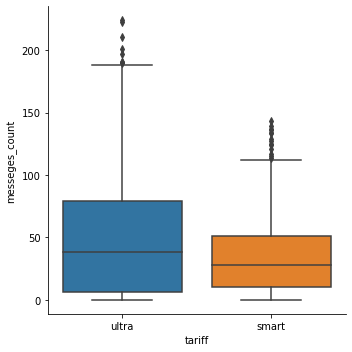

In [23]:
for column in ['min_sum', 'mb_used', 'messeges_count']:    
    sns.catplot(x='tariff', y=column, kind="box", data=total_users, orient='v')

Text(0.5, 1.0, 'Гистограмма звонков')

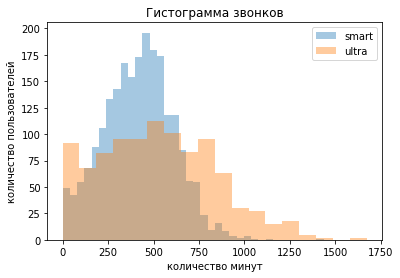

In [24]:
smart = total_users.query("tariff == 'smart'")
ultra = total_users.query("tariff == 'ultra'")
sns.distplot(smart['min_sum'], kde=False)
sns.distplot(ultra['min_sum'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.title('Гистограмма звонков')


Text(0.5, 1.0, 'Гистограмма интернет траффика')

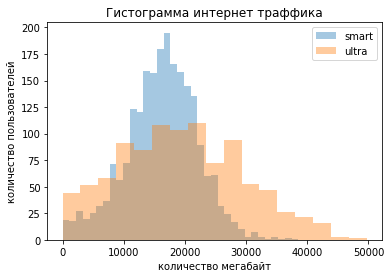

In [25]:
smart = total_users.query("tariff == 'smart'")
ultra = total_users.query("tariff == 'ultra'")
sns.distplot(smart['mb_used'], kde=False)
sns.distplot(ultra['mb_used'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество мегабайт')
plt.ylabel('количество пользователей')
plt.title('Гистограмма интернет траффика')

Text(0.5, 1.0, 'Гистограмма сообщений')

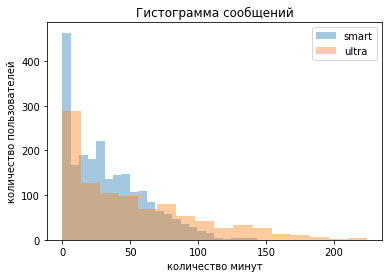

In [26]:
smart = total_users.query("tariff == 'smart'")
ultra = total_users.query("tariff == 'ultra'")
sns.distplot(smart['messeges_count'], kde=False)
sns.distplot(ultra['messeges_count'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.title('Гистограмма сообщений')

Вывод:Гистаграммы показывают, что дисперсия по "Ультра" больше, чем у пользователей с тарифом "Смарт". Пользователи тарифа Ультра имеют больше возможностей.


Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Нулевой гипотезой будет гипотеза о том, что средние наших выборок равны. Альтернативной гипотезой будет наша гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".


In [27]:
alpha = 0.05 
results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Для проверки гипотезы создадим две соответствующие таблицы moscow и regions.
H0 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
H1 - Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов




In [35]:
#создадим две таблицы, в одной будут все клиенты из москвы, во второй - все остальные
moscow = total_users[total_users['city'] == 'Москва']
regions = total_users[total_users['city'] != 'Москва']

In [36]:

#проверим соотношения пользователей разных тарифов в наших выборках
moscow.pivot_table(index = 'tariff', values = 'user_id', aggfunc = 'count')
regions.pivot_table(index = 'tariff', values = 'user_id', aggfunc = 'count')


,user_id
tariff,
smart,1843
ultra,760


In [37]:
alpha = 0.05
results = st.ttest_ind(moscow['revenue'], regions['revenue'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Вывод по гипотезе 2:

Соотношение в двух наших таблицах клиентов с разными тарифами примерно одинаковое.



1.По результатам анализа, доходы от тарифа ультра больше чем от тарифа смарт.
2.Судя по гистограммам не все пользователи тарифа «Ультра» используют весь доступный лимит.
3.Доплат по тарифу «Ультра» очень мало. В тарифе «Смарт» часто доплачивают за дополнительные пакеты гигобайт
4.Средние доходы от пользователей в Москве не отличаются от доходов в других городах.
5.Отвечая на вопрос какой тариф лучше для оператора, это тариф Ультра.